In [4]:
import pandas as pd
chipo = pd.read_csv("data/chipotle.tsv",sep="\t")
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
#chipo["item_price"] = chipo["item_price"].str.replace("$","").astype(float)
# apply 함수 : DataFrame 에서 요소들에 적용되는 함수 설정
# apply(함수명||람다식)
chipo["item_price"] = chipo["item_price"].apply(lambda x : float(x[1:]))
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [12]:
#주문당 주문 금액이 가장 높은 5건의 주문 총수량을 출력하기
#1. 주문당 주문 금액 order_amt 변수 저장하기
order_amt = chipo.groupby("order_id").sum()
order_amt
#2 주문당 주문 금액이 가장 높은 5건의 데이터를 price5 저장하기
price5 = order_amt.sort_values(by="item_price",ascending=False)[:5]
price5
#3 price5의 총 주문수량의 합 출력하기
price5.quantity.sum()
price5.quantity.mean()

np.float64(20.6)

In [15]:
price5

,quantity,item_name,choice_description,item_price
order_id,,,,
926,23,Steak BurritoChicken BowlChicken BowlChicken B...,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuc...",205.25
1443,35,Chips and Fresh Tomato SalsaBottled Water6 Pac...,"[Coke][Fresh Tomato Salsa, [Fajita Vegetables,...",160.74
1483,14,Chicken BowlSteak BowlChicken BurritoSteak Bow...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",139.00
691,11,Chicken BurritoChicken Salad BowlSteak Burrito...,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",118.25
1786,20,Chicken BowlCarnitas BurritoChicken BowlChicke...,"[Fresh Tomato Salsa, Rice][Fresh Tomato Salsa,...",114.30


In [14]:
#주문당 주문금액이 높은 5건의 주문 정보 출력하기
chipo[chipo["order_id"].isin(price5.index)]

,order_id,quantity,item_name,choice_description,item_price
1707,691,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",8.75
1708,691,1,Chicken Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.25
1709,691,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",9.25
1710,691,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Pinto Beans...",8.75
1711,691,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.25
...,...,...,...,...,...
4487,1786,1,Carnitas Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Guaca...",11.75
4488,1786,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
4489,1786,4,Chips and Guacamole,NaN,17.80
4490,1786,4,Canned Soft Drink,[Coke],5.00


In [18]:
#Veggie Salad Bowl 상품이 몇번 주문되었는지 출력하기
chipo_salad = chipo[chipo["item_name"] == "Veggie Salad Bowl"]
chipo_salad.count()

order_id              18
quantity              18
item_name             18
choice_description    18
item_price            18
dtype: int64

In [102]:
#국가별 음주 데이터 분석하기 : drinks.csv
drinks = pd.read_csv("data/drinks.csv")
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


country : 국가명
beer_servings : 맥주소비량
spirit_servings : 음료소비량
wine_servings : 와인소비량   
total_litres_of_pure_alcohol : 순수 알콜량
continent : 대륙명

In [23]:
#맥주소비량과와인소비량의 상관계수 출력하기
# 피어슨상관계수 : 기본상관계수
#drinks[["beer_servings","wine_servings"]].corr()
drinks[["beer_servings","wine_servings"]].corr(method="pearson")

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [ ]:
#켄달 상관계수 : 샘플의 크기가 작은 경우에 효과 좋다. scipy 모듈 사용
drinks[["beer_servings","wine_servings"]].corr(method="kendall")

In [25]:
#스피어만 상관계수 : 정규화 되지 않은 데이터 많이 사용
drinks[["beer_servings","wine_servings"]].corr(method="spearman")

,beer_servings,wine_servings
beer_servings,1.000000,0.716275
wine_servings,0.716275,1.000000


In [26]:
import seaborn as sns  #시각화 모듈

In [30]:
cols

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [31]:
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


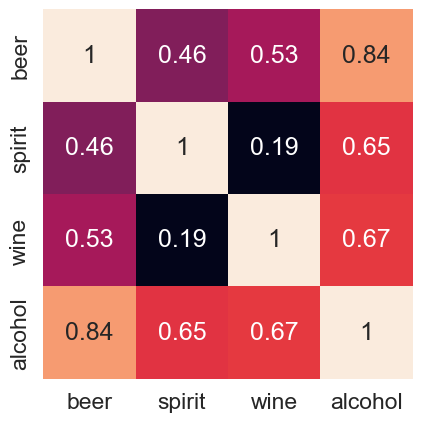

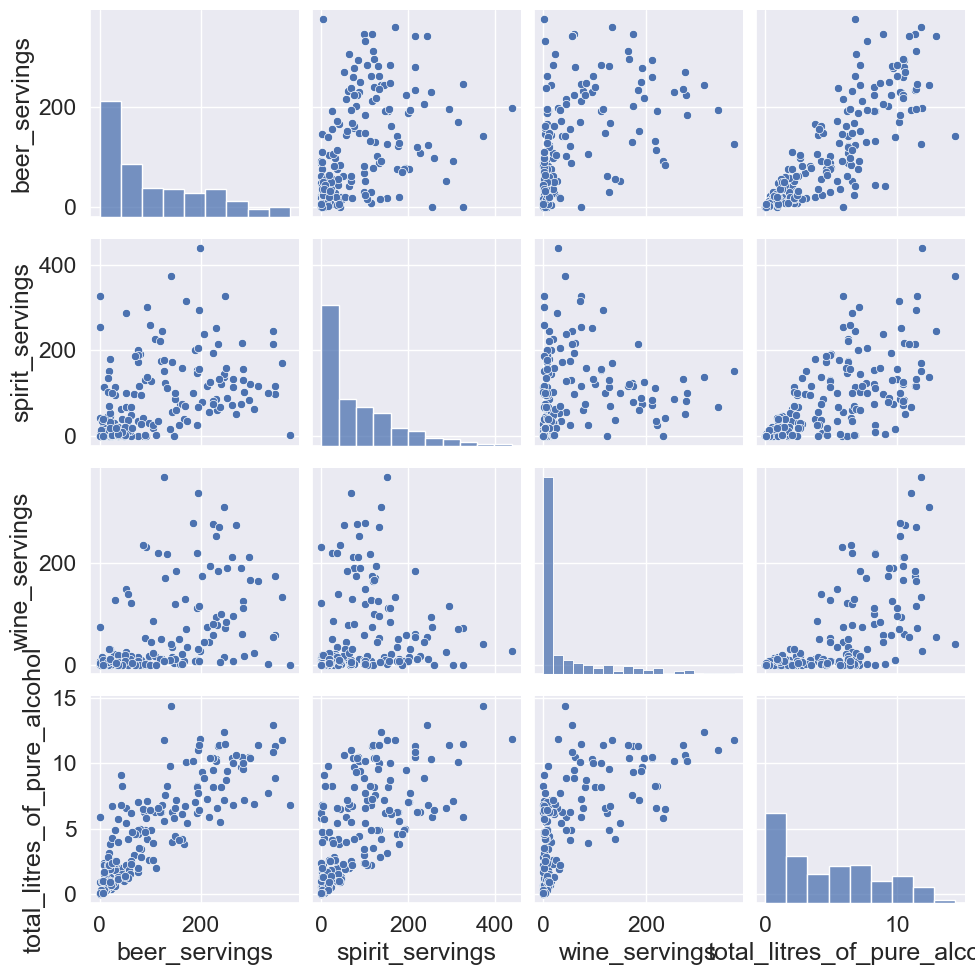

In [35]:
#상관계수 시각화 하기
cols = drinks.columns[1:-1] #국가,대륙정보 제거
corr = drinks[cols].corr() #국가,대륙정보를 제외한 다른 컬럼들 사이의 상관 계수 
cols_view = ["beer","spirit","wine","alcohol"]
#sns.set(font_scale=1.5)
#상관계수를 히트맵으로 시각화 하기
hm=sns.heatmap(corr.values,  #데이터
                cbar=False,   #색상맵. True:기본
                annot=True,   #데이터값 표시
                square=True,  #사각형으로 표시
                yticklabels=cols_view,
                xticklabels=cols_view) 
#산점도 출력
sns.pairplot(drinks[cols])

<Axes: xlabel='beer_servings', ylabel='total_litres_of_pure_alcohol'>

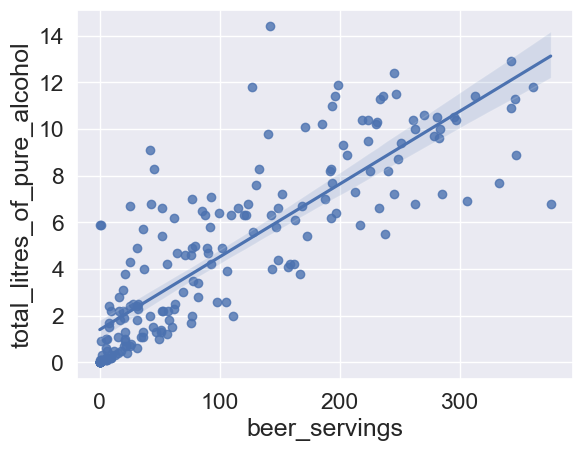

In [37]:
#회귀 그래프 출력하기
sns.regplot(x="beer_servings",y="total_litres_of_pure_alcohol", data=drinks)

In [38]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [39]:
#각 컬럼(변수)별 결측값의 갯수 출력하기
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [41]:
#대륙별 국가수 출력하기
drinks["continent"].value_counts()
drinks["continent"].value_counts(dropna=False)

continent
AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: count, dtype: int64

In [103]:
#continent의 결축값을 OT 값으로 변경하기
#fillna : 결측값을 다른 값으로 치환.
drinks["continent"] = drinks["continent"].fillna("OT")
drinks["continent"].value_counts()

continent
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: count, dtype: int64

In [45]:
#대륙별 국가의 갯수를 파이그래프로 출력하기
labels = drinks["continent"].value_counts().index.tolist()
labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [46]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "null data to 'OT'")

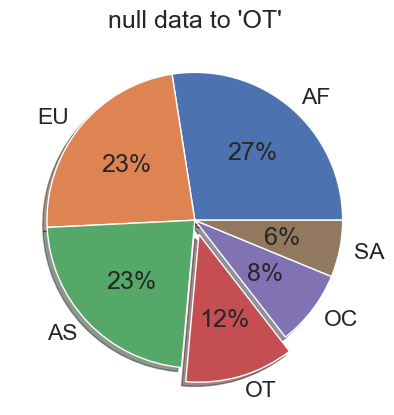

In [50]:
explode = (0, 0, 0, 0.1, 0, 0) #AF,EU,AS,OT,OC,SA 순서
plt.pie(drinks['continent'].value_counts(),  #수치데이터
    labels=labels,  #라벨명. 대륙코드
    autopct='%.0f%%',  #비율표시. %.0f : 소숫점이하 없음. %%:%문자
    explode=explode,   #파이들의 위치지정. 0.1:10%정도 밖으로 표시
    shadow=True)       #그림자 표시
#plt.title('null data to \'OT\'')
plt.title("null data to 'OT'")

In [59]:
#대륙별 spirit_servings의 평균,최소,최대,합계 출력하기
print("대륙별 평균:",drinks.groupby("continent")["spirit_servings"].mean())
print("대륙별 최소:",drinks.groupby("continent")["spirit_servings"].min())
print("대륙별 최대:",drinks.groupby("continent")["spirit_servings"].max())
print("대륙별 합계:",drinks.groupby("continent")["spirit_servings"].sum())

대륙별 합계: continent
AF     866
AS    2677
EU    5965
OC     935
OT    3812
SA    1377
Name: spirit_servings, dtype: int64


In [61]:
#대륙별 spirit_servings의 평균,최소,최대,합계 출력하기
# agg : 여러개의 함수를 설정하기
drinks.groupby("continent")["spirit_servings"].agg(["mean","min","max","sum"])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [70]:
#total_litres_of_pure_alcohol : 순수 알콜량
#대륙별 알콜량의 평균이 전체 알콜량 평균보다 많은 대륙 출력하기
#1. 전체 알콜량 평균을 total_mean 변수에 저장하기
total_mean = drinks["total_litres_of_pure_alcohol"].mean()
total_mean  #4.717098445595855
#2. 대륙별 알콜 평균을 cont_mean 변수에저장하기
cont_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
cont_mean
#3. 전체 알콜량 평균보다 많은 대륙 출력
#cont_mean[cont_mean > total_mean].index.tolist()
list(cont_mean[cont_mean > total_mean].index)

['EU', 'OT', 'SA']

In [80]:
#대륙별 beer_servings 평균이 가장 많은 대륙 출력하기
#drinks.groupby("continent").beer_servings.mean().sort_values(ascending=False).index[0]
#idxmax() : 데이터 중 가장 큰값의 인덱스 리턴
drinks.groupby("continent").beer_servings.mean().idxmax()

'EU'

In [82]:
#대륙별 wine_servings 평균이 가장 적은 대륙 출력하기
drinks.groupby("continent").wine_servings.mean()
#drinks.groupby("continent").wine_servings.mean().idxmin()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

Text(0.5, 1.0, '대륙별 평균알콜 섭취량')

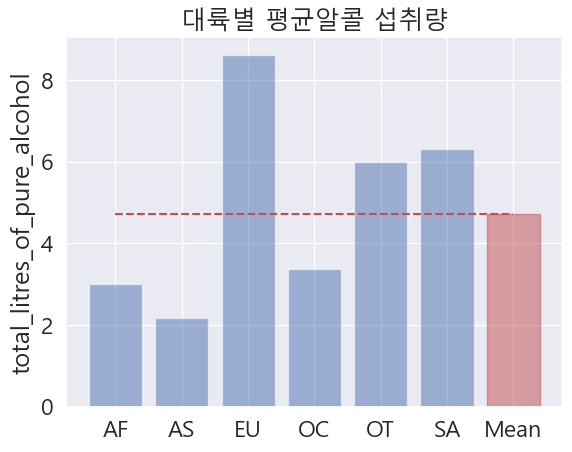

In [85]:
#대륙별 total_litres_of_pure_alcohol 섭취량 평균 시각화 하기
import numpy as np
plt.rc("font",family="Malgun Gothic") #한글 폰트 설정
#cont_mean : 대륙별 알콜소비량의 평균
cont_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
#continents : 대륙코드명 + Mean. 리스트
continents = cont_mean.index.tolist()
continents.append("Mean")
#x_pos : 0~ continents요소의 갯수-1
x_pos = np.arange(len(continents)) 
alcohol = cont_mean.tolist()  #대륙별 알콜소비량의 평균 데이터
#total_mean : 전체 알콜소비량 평균
total_mean = drinks["total_litres_of_pure_alcohol"].mean()
alcohol.append(total_mean)
#bar(x축값,y축의값,위치,투명도) : 막대그래프
#bar_list : 막대그래프의 막대 목록
bar_list =plt.bar(x_pos, alcohol, align='center',alpha=0.5)
#len(continents) - 1 : 마지막 막대
#set_color('r') : r:red. 
bar_list[len(continents) - 1].set_color('r') #마지막막대의 색상을 빨강으로 변경
#plot : 선그래프
#[0., 6] : x축의값
#[total_mean, total_mean] : y축의값
#"k-" : 검정색, -:실선, --:댓쉬선
plt.plot([0., 6], [total_mean, total_mean], "r--")
plt.xticks(x_pos, continents) #x축 레이블을 변경
plt.ylabel('total_litres_of_pure_alcohol') #y축 설명
plt.title('대륙별 평균알콜 섭취량') #그래프 제목

In [86]:
#대륙별 beer_servings의 평균를 막대그래프로 시각화
#가장 많은 맥주를 소비하는 대륙(EU)의 막대의 색상을 빨강색("r")으로 변경하기 
#전체 맥주 소비량 평균을 구해서 막대그래프에 추가
#평균선을 출력하기. 평균 막대 색상은 노랑색 ("y")
#평균선은 검정색("k--")
#1. 전체 맥주 소비량 평균
total_beer = drinks.beer_servings.mean()
#2. 대륙별 맥주 소비량 평균
beer_mean = drinks.groupby("continent").beer_servings.mean()
continents = beer_mean.index.tolist()
continents.append("Mean")

In [88]:
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'Mean']

In [89]:
beer_mean

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [90]:
beer

[61.471698113207545,
 37.04545454545455,
 193.77777777777777,
 89.6875,
 145.43478260869566,
 175.08333333333334,
 np.float64(106.16062176165804)]

In [96]:
print(beer_mean)
print("최대값:",beer_mean.max())
print("최대값의 인덱스:",beer_mean.idxmax())
print("최대값의 위치값:",beer_mean.argmax())
#contents 값의 Mean 요소의 위치값 출력하기
print("Mean 의 위치값:",continents.index("Mean"))

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64
최대값: 193.77777777777777
최대값의 인덱스: EU
최대값의 위치값: 2
Mean 의 위치값: 6


([<matplotlib.axis.XTick at 0x1c299a66e40>,
 [Text(0, 0, 'AF'),
  Text(1, 0, 'AS'),
  Text(2, 0, 'EU'),
  Text(3, 0, 'OC'),
  Text(4, 0, 'OT'),
  Text(5, 0, 'SA'),
  Text(6, 0, 'Mean')])

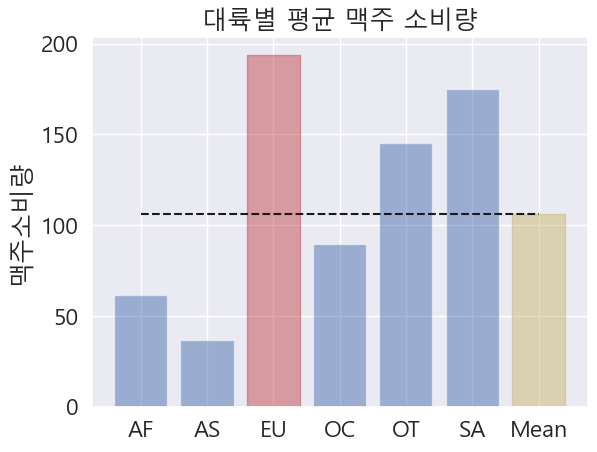

In [87]:
x_pos = np.arange(len(continents)) #0~6
beer = beer_mean.tolist()
beer.append(total_beer) #전체 평균값 추가
#막대그래프 출력
bar_list = plt.bar(x_pos,beer,align="center",alpha=0.5)
#색상변경
#beer_mean.argmax() : beer_mean데이터 중 최대값의 위치값
bar_list[beer_mean.argmax()].set_color("r")
#continents.index("Mean") : Mean 요소의 위치값
bar_list[continents.index("Mean")].set_color("y")
plt.plot([0,6],[total_beer,total_beer],'k--')
plt.ylabel("맥주소비량")
plt.title("대륙별 평균 맥주 소비량")
plt.xticks(x_pos,continents)

In [104]:
#total_servings : 전체 주류 소비량 컬럼 추가
drinks["total_servings"] = \
    drinks["beer_servings"] + drinks["spirit_servings"] +\
    drinks["wine_servings"]

In [105]:
#alcohol_rate : 알콜비율 (알콜섭취량/전체주류소비량) 컬럼 추가
drinks["alcohol_rate"] = \
    drinks["total_litres_of_pure_alcohol"]/drinks["total_servings"] 

In [106]:
#alcohol_rate 컬럼에 결측값 존재
#  total_servings 컬럼의 값이 0인 경우 
#  0으로 나눈 경우 불능 => 결측값
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   total_servings                193 non-null    int64  
 7   alcohol_rate                  180 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [108]:
#alcohol_rate 컬럼이 결측값인 데이터 조회하기
drinks[drinks["alcohol_rate"].isnull()]\
    [["country","total_servings","alcohol_rate"]]

,country,total_servings,alcohol_rate
0,Afghanistan,0,NaN
13,Bangladesh,0,NaN
46,North Korea,0,NaN
79,Iran,0,NaN
90,Kuwait,0,NaN
97,Libya,0,NaN
103,Maldives,0,NaN
106,Marshall Islands,0,NaN
107,Mauritania,0,NaN
111,Monaco,0,NaN


In [109]:
#alcohol_rate 컬럼의 결측값을 0으로 치환하기
drinks["alcohol_rate"] = drinks["alcohol_rate"].fillna(0)

In [110]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   total_servings                193 non-null    int64  
 7   alcohol_rate                  193 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [112]:
#alcohol_rate 의 내림차순으로 정렬하기
alcohol_rate_rank = drinks.sort_values(by="alcohol_rate",ascending=False)
alcohol_rate_rank[["country","alcohol_rate"]]

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
97,Libya,0.000000
103,Maldives,0.000000
111,Monaco,0.000000
158,Somalia,0.000000


In [114]:
#대한민국의 순번을 출력하기
alcohol_rate_rank.country.tolist().index("South Korea") #15번째

14

In [119]:
alcohol_rate_rank.iloc[[14]]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
138,South Korea,140,16,9,9.8,AS,165,0.059394


In [116]:
#시각화하기
import numpy as np
import matplotlib.pyplot as plt

Text(24, 0.1093939393939394, 'South Korea : 15번째')

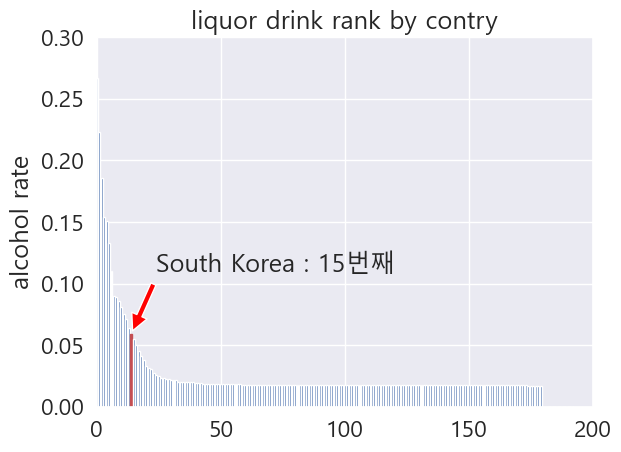

In [117]:
plt.rc("font",family="Malgun Gothic")
country_list = alcohol_rate_rank.country.tolist()
x_pos = np.arange(len(country_list)) #x축의 값
rank = alcohol_rate_rank.alcohol_rate.tolist()  #y축의 값
bar_list = plt.bar(x_pos, rank) #막대그래프
#대한민국의 위치에 해당하는 막대의 색을 빨강색으로 변경
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')  #y축설명
plt.title('liquor drink rank by contry') #제목
#x,y축의 범위 지정
#[x축의시작값,x축의종료값,y축의시작값,y축의종료값]
plt.axis([0, 200, 0, 0.3])
#korea_rank : 대한민국의 위치값
korea_rank = country_list.index("South Korea")
#korea_alc_rate : 대한민국의 알콜비율값
korea_alc_rate = alcohol_rate_rank\
[alcohol_rate_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
#annotate : 그래프의 설명선 추가
#annotate(출력값,xy축의값,설명문의 시작위치,)
plt.annotate('South Korea : ' + str(korea_rank + 1)+"번째",
            xy=(korea_rank, korea_alc_rate), #x,y축의값       
            xytext=(korea_rank + 10, korea_alc_rate + 0.05), #설면문의 시작좌표
            #facecolor='red' : 선의색
            #shrink=0.05 : 선의길이
            arrowprops=dict(facecolor='red', shrink=0.05))  #화살표출력

대한민국의 전체 술소비량의 위치값을 그래프작성하기

total_servings 전체 술소비량을 막대그래프로 작성하고,
 대한민국의 위치를 빨강색으로 표시하기
 1.total_serving_rank = drinks[["country","total_servings"]]
 2.total_serving_rank total_servings 값의 내림차순으로 정렬 
 3.total_serving_rank 데이터를 막대그래프로 작성.
   대한민국의 데이터는 빨강색으로 변경
 4.막대그래프에 설명선 추가하기

In [121]:
#국가명, 전체주류소비량데이터만 total_serving_rank 저장
total_serving_rank = drinks[['country', 'total_servings']]
#total_serving_rank : 주류소비량의 내림차순으로 정렬함
total_serving_rank = total_serving_rank.sort_values\
                   (by=['total_servings'], ascending=False)


In [122]:
total_serving_rank

,country,total_servings
3,Andorra,695
45,Czech Republic,665
68,Grenada,665
61,France,648
141,Russian Federation,646
...,...,...
97,Libya,0
103,Maldives,0
111,Monaco,0
158,Somalia,0


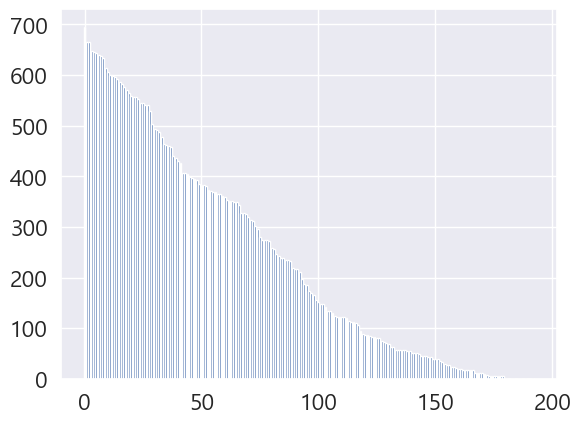

In [123]:
country_list = total_serving_rank.country.tolist() #국가명
x_pos = np.arange(len(country_list))  #x축값 
rank = total_serving_rank.total_servings.tolist()  #y축의 값
#bar_list : 막대그래프의 막대목록
bar_list = plt.bar(x_pos, rank)  #막대그래프 출력
#korea_rank : 대한민국의 위치값
korea_rank = country_list.index("South Korea")

In [124]:
korea_rank

98

Text(103, 265, 'South Korea : 99번째')

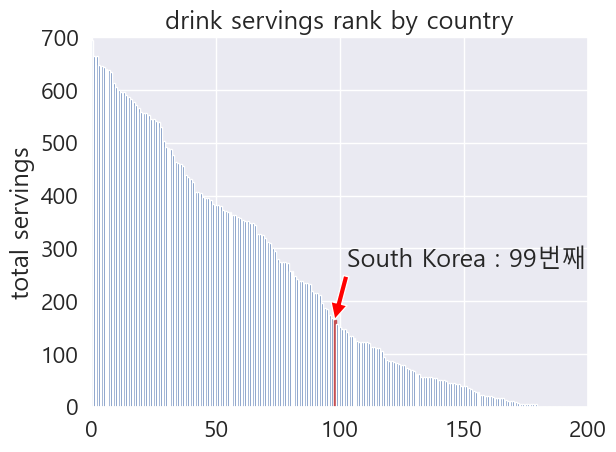

In [194]:
country_list = total_serving_rank.country.tolist() #국가명
x_pos = np.arange(len(country_list))  #x축값 
rank = total_serving_rank.total_servings.tolist()  #y축의 값
#bar_list : 막대그래프의 막대목록
bar_list = plt.bar(x_pos, rank)  #막대그래프 출력
#korea_rank : 대한민국의 위치값
korea_rank = country_list.index("South Korea")
bar_list[korea_rank].set_color('r') #대한민국의 막대의 색을 빨강색으로 변경
plt.ylabel('total servings')
plt.title('drink servings rank by country')
plt.axis([0, 200, 0, 700]) #XY축의값의 범위
#korea_serving_rate : 대한민국의 전체 술소비량값
korea_serving_rate = total_serving_rank\
[ total_serving_rank['country']=='South Korea']['total_servings'].values[0]
#설명선
#shrink=1 : 데이터와 설명사이의 화살표 길이의 비율
#       1 : 100%
#       0.1 : 10% 축소
#       0.9 : 90% 축소
plt.annotate('South Korea : ' + str(korea_rank + 1)+"번째", 
          xy=(korea_rank, korea_serving_rate), 
          xytext=(korea_rank + 5, korea_serving_rate + 100),
          arrowprops=dict(facecolor='red',shrink=1))

서울시 각 구별 CCTV수를 파악하고 인구대비 CCTV 비율을 파악해서 순위 비교
서울시 각 구별 CCTV수 : 01. CCTV_in_Seoul.csv
서울시 인구 현황      : 01. population_in_Seoul.xls

In [138]:
import pandas as pd
CCTV_Seoul = pd.read_csv("data/01. CCTV_in_Seoul.csv")
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [139]:
#pip install xlrd
#header=2 : 3번째 행을 header로 사용 
#usecols="B,D,G,J,N" : 선택된 셀만 읽기
Pop_Seoul =  pd.read_excel("data/01. population_in_Seoul.xls",\
                      header=2,usecols="B,D,G,J,N")
Pop_Seoul.info()
Pop_Seoul.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   계         26 non-null     float64
 2   계.1       26 non-null     float64
 3   계.2       26 non-null     float64
 4   65세이상고령자  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [144]:
#컬럼명 변경하기
#CCTV_Seoul : 기관명 -> 구별
CCTV_Seoul.rename(columns={"기관명":"구별"},inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [146]:
#Pop_Seoul 의 컬럼명 변경하기
Pop_Seoul.columns= ["구별","인구수","한국인","외국인","고령자"]
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [147]:
#Pop_seoul 데이터의 첫번째 행을 제거하기
Pop_Seoul.drop([0],inplace=True,axis=0)
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [159]:
#CCTV 최근 증가율이 높은 지역 5개 출력하기
#1. 최근 증가율 컬럼 추가
#    (2014~2016 의 갯수 / 2013년의 갯수 ) * 100
CCTV_Seoul["최근증가율"] = \
(CCTV_Seoul["2014년"]+CCTV_Seoul["2015년"]+CCTV_Seoul["2016년"])\
    /CCTV_Seoul["2013년도 이전"] * 100
#2. 최근 증가율 컬럼으로 내림차순 정렬하여 5개 출력
CCTV_Seoul.sort_values(by="최근증가율",ascending=False)[:5]

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [160]:
#Pop_Seoul 외국인 비율 컬럼 추가하기
#    (외국인/인구수) * 100
Pop_Seoul["외국인비율"]=Pop_Seoul["외국인"]/Pop_Seoul["인구수"] * 100
#Pop_Seoul 고령자 비율 컬럼 추가하기
#    (고령자/인구수) * 100
Pop_Seoul["고령자비율"]=Pop_Seoul["고령자"]/Pop_Seoul["인구수"] * 100
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [161]:
#구별컬럼을 연결컬럼으로 CCTV,인구데이터를 합치기
data_result = pd.merge(CCTV_Seoul,Pop_Seoul, on="구별")
data_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구별         25 non-null     object 
 1   소계         25 non-null     int64  
 2   2013년도 이전  25 non-null     int64  
 3   2014년      25 non-null     int64  
 4   2015년      25 non-null     int64  
 5   2016년      25 non-null     int64  
 6   최근증가율      25 non-null     float64
 7   인구수        25 non-null     float64
 8   한국인        25 non-null     float64
 9   외국인        25 non-null     float64
 10  고령자        25 non-null     float64
 11  외국인비율      25 non-null     float64
 12  고령자비율      25 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.7+ KB


In [162]:
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [164]:
#data_result 데이터에서 2013,2014,2015,2016년도 컬럼을 제거하기
data_result.drop(["2013년도 이전","2014년","2015년","2016년"],\
                 axis=1,inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [165]:
#구별 컬럼을 인덱스로 변경하기
data_result.set_index("구별",inplace=True)
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     float64
 3   한국인     25 non-null     float64
 4   외국인     25 non-null     float64
 5   고령자     25 non-null     float64
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 1.8+ KB


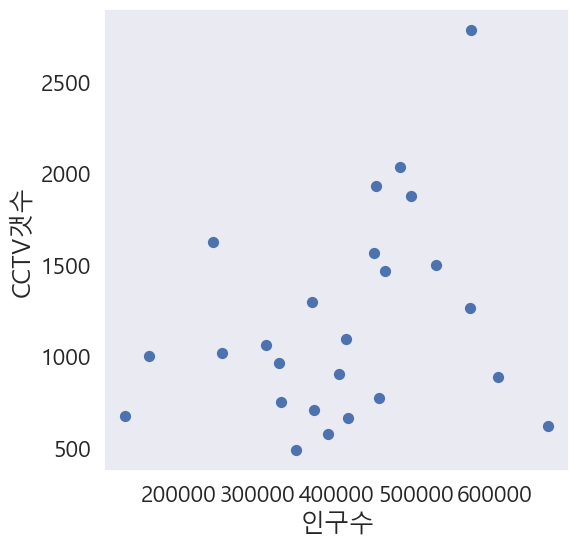

In [197]:
plt.figure(figsize=(6,6))
#산점도
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV갯수")
plt.grid()


In [204]:
#인구수와 소계 데이터의 산점도, 회귀선 출력하기
import numpy as np
#polyfit : 수학함수. 상수값 리턴
#          모드점과의 차이가 가장 적은 직선의 상수값 리턴
# 1차식 : ax+b a:기울기, b:절편
# 2차식 : ax**2 + bx + c . 곡선 
fp1 = np.polyfit(data_result["인구수"],data_result["소계"],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

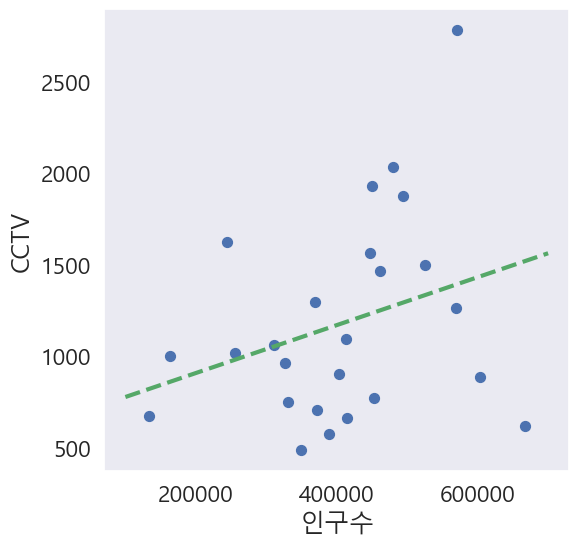

In [202]:
f1 = np.poly1d(fp1) #ax + b 함수
#100000 ~ 700000 사이의 값을 100개로 균등분할한 배열
fx=np.linspace(100000,700000,100)
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"],s=50) #산점도
plt.plot(fx,f1(fx), ls="dashed", lw=3, color='g') #선그래프
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [205]:
#오차 컬럼 추가 : |실제CCTV갯수 - 기대CCTV갯수|
#np.abs : 절대값 함수
# data_result["소계"] : 실제CCTV갯수
# f1(data_result["인구수"]) : 기대 CCTV 갯수
data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"]))
data_result.오차.head()

구별
강남구    1388.055355
강동구     465.422892
강북구     329.342026
강서구     551.503155
관악구     162.948104
Name: 오차, dtype: float64

In [207]:
#오차가 큰순으로 정렬하기
df_sort = data_result.sort_values(by="오차",ascending=False)
df_sort["오차"]

구별
강남구     1388.055355
송파구      900.911312
양천구      760.563512
서초구      695.403794
용산구      659.231690
도봉구      616.501341
마포구      581.180999
은평구      580.698457
강서구      551.503155
중랑구      527.718965
강동구      465.422892
광진구      425.290264
구로구      329.592918
강북구      329.342026
영등포구     268.640012
성북구      215.068447
동대문구     165.202586
관악구      162.948104
중구       148.499528
종로구      143.775396
노원구      125.483618
서대문구     111.376568
동작구       94.122892
금천구       35.989293
성동구        9.464016
Name: 오차, dtype: float64

C:\Users\123rl\AppData\Local\Temp\ipykernel_18920\1765520600.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort["인구수"][n]*1.02,df_sort["소계"][n]*0.98,


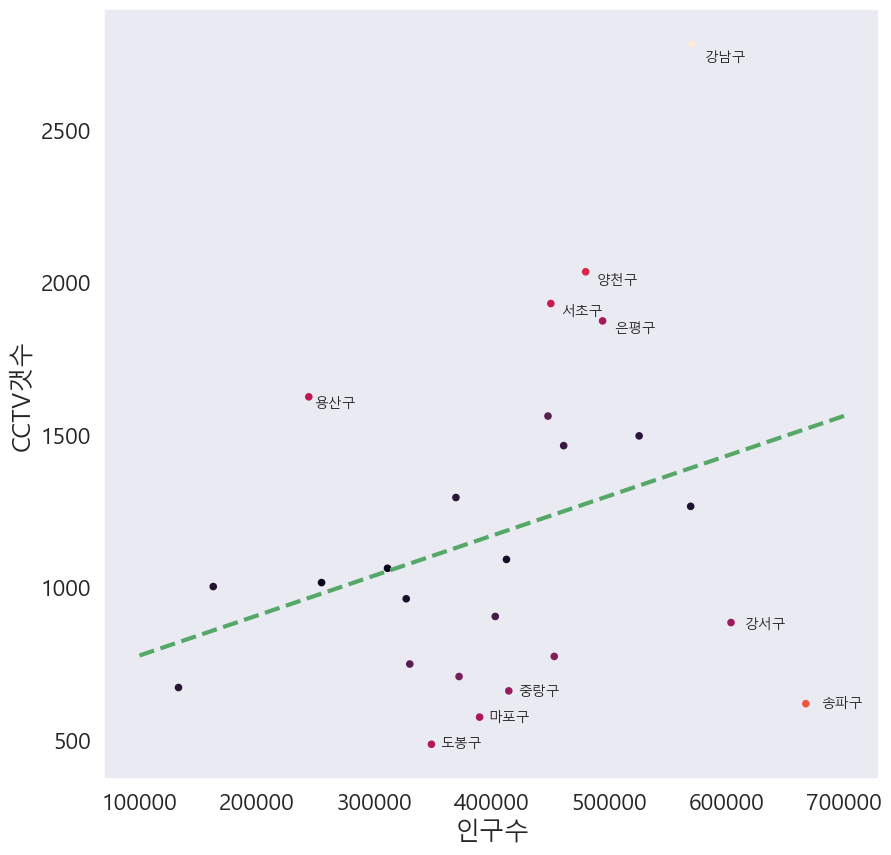

In [209]:
plt.figure(figsize=(10,10))
#산점도
#c=data_result["오차"] : 색상표현
plt.scatter(data_result["인구수"],data_result["소계"],
            c=data_result["오차"],s=20)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g') #회귀선
#구명 출력하기
#df_sort : 오차의 내림차순으로 정렬된 데이터
for n in range(10) :  #오차가 큰 10개의 구를 화면에 문자로 출력함
    #plt.text(x좌표,y좌표,출력문자,문자크기)
    #fontsize=10 : 문자크기
    plt.text(df_sort["인구수"][n]*1.02,df_sort["소계"][n]*0.98,
             df_sort.index[n],fontsize=10)
plt.xlabel("인구수")
plt.ylabel("CCTV갯수")    
plt.colorbar()
plt.grid()